# Humicroedit eda / preprocessing

### x

In [58]:
import pandas as pd

In [59]:
train_humi = pd.read_csv('Data/Humi/semeval-2020-task-7-dataset/subtask-1/train.csv', dtype={'grades': str})

In [60]:
train_humi.head(20)

,id,original,edit,grades,meanGrade
0,14530,France is ‘ hunting down its citizens who join...,twins,10000,0.2
1,13034,"Pentagon claims 2,000 % increase in Russian tr...",bowling,33110,1.6
2,8731,Iceland PM Calls Snap Vote as Pedophile Furor ...,party,22100,1.0
3,76,"In an apparent first , Iran and Israel <engage...",slap,20000,0.4
4,6164,Trump was told weeks ago that Flynn misled <Vi...,school,00000,0.0
5,8832,All 22 <promises/> Trump made in his speech to...,sounds,22200,1.2
6,12174,New DOJ alert system will flag <crimes/> again...,laughter,32100,1.2
7,3731,As Someone Who Grew Up Among Fundamentalist <C...,morons,21110,1.0
8,6554,"Canadians may pay more taxes than Americans , ...",loonies,10000,0.2
9,14191,Dutch minister resigns in drug baron <row/>,blow,00000,0.0


In [61]:
train_humi.count()

id           9652
original     9652
edit         9652
grades       9652
meanGrade    9652
dtype: int64

### Deleting bugged values (more than 5 annotated values)

In [62]:
train_humi = train_humi[train_humi['grades'].str.len() == 5]

In [63]:
train_humi

,id,original,edit,grades,meanGrade
0,14530,France is ‘ hunting down its citizens who join...,twins,10000,0.2
1,13034,"Pentagon claims 2,000 % increase in Russian tr...",bowling,33110,1.6
2,8731,Iceland PM Calls Snap Vote as Pedophile Furor ...,party,22100,1.0
3,76,"In an apparent first , Iran and Israel <engage...",slap,20000,0.4
4,6164,Trump was told weeks ago that Flynn misled <Vi...,school,00000,0.0
...,...,...,...,...,...
9647,10899,State officials blast ' unprecedented ' DHS <m...,idea,00000,0.0
9648,1781,Protesters Rally for <Refugees/> Detained at J...,stewardesses,20000,0.4
9649,5628,Cruise line Carnival Corp. joins the fight aga...,raisin,21000,0.6
9650,14483,Columbia police hunt woman seen with <gun/> ne...,cake,32200,1.4


In [64]:
train_humi.count()

id           9510
original     9510
edit         9510
grades       9510
meanGrade    9510
dtype: int64

In [65]:
unique_grades = train_humi['grades'].unique()
print(unique_grades)

['10000' '33110' '22100' '20000' '00000' '22200' '32100' '21110' '11110'
 '33100' '11100' '21100' '22211' '32110' '22110' '22111' '22210' '22000'
 '21000' '31111' '11111' '11000' '33200' '33111' '32000' '32222' '31000'
 '21111' '32200' '33211' '32220' '32211' '31100' '33310' '33320' '32210'
 '33222' '22220' '33220' '31110' '32111' '33210' '30000' '33221' '33321'
 '32221' '22221' '33322' '33311' '33000' '33332' '33331' '33333' '22222'
 '33300' '33330']


#### first annotator never annotates 0

### Replacing '</>' with changed ones

In [66]:
import re

def replace_text(row):
    original_text = row['original']
    edit_text = row['edit']
    replaced_text = re.sub(r'<.*?/>', edit_text, original_text)
    return replaced_text

train_humi['original'] = train_humi.apply(replace_text, axis=1)

In [67]:
train_humi.drop(columns=['edit'], inplace=True)

In [68]:
train_humi

,id,original,grades,meanGrade
0,14530,France is ‘ hunting down its citizens who join...,10000,0.2
1,13034,"Pentagon claims 2,000 % increase in Russian tr...",33110,1.6
2,8731,Iceland PM Calls Snap Vote as Pedophile Furor ...,22100,1.0
3,76,"In an apparent first , Iran and Israel slap ea...",20000,0.4
4,6164,Trump was told weeks ago that Flynn misled sch...,00000,0.0
...,...,...,...,...
9647,10899,State officials blast ' unprecedented ' DHS id...,00000,0.0
9648,1781,Protesters Rally for stewardesses Detained at ...,20000,0.4
9649,5628,Cruise line Carnival Corp. joins the fight aga...,21000,0.6
9650,14483,Columbia police hunt woman seen with cake near...,32200,1.4


### Adjusting grades values to multi annotaded/personalised form 

In [69]:
annotators = ["annotator_1", "annotator_2", "annotator_3", "annotator_4", "annotator_5"]

for i, annotator in enumerate(annotators):
    train_humi[annotator] = [int(grade[i]) for grade in train_humi['grades']]


In [70]:
train_humi[:20]

,id,original,grades,meanGrade,annotator_1,annotator_2,annotator_3,annotator_4,annotator_5
0,14530,France is ‘ hunting down its citizens who join...,10000,0.2,1,0,0,0,0
1,13034,"Pentagon claims 2,000 % increase in Russian tr...",33110,1.6,3,3,1,1,0
2,8731,Iceland PM Calls Snap Vote as Pedophile Furor ...,22100,1.0,2,2,1,0,0
3,76,"In an apparent first , Iran and Israel slap ea...",20000,0.4,2,0,0,0,0
4,6164,Trump was told weeks ago that Flynn misled sch...,00000,0.0,0,0,0,0,0
5,8832,All 22 sounds Trump made in his speech to Cong...,22200,1.2,2,2,2,0,0
6,12174,New DOJ alert system will flag laughter agains...,32100,1.2,3,2,1,0,0
7,3731,As Someone Who Grew Up Among Fundamentalist mo...,21110,1.0,2,1,1,1,0
8,6554,"Canadians may pay more taxes than Americans , ...",10000,0.2,1,0,0,0,0
9,14191,Dutch minister resigns in drug baron blow,00000,0.0,0,0,0,0,0


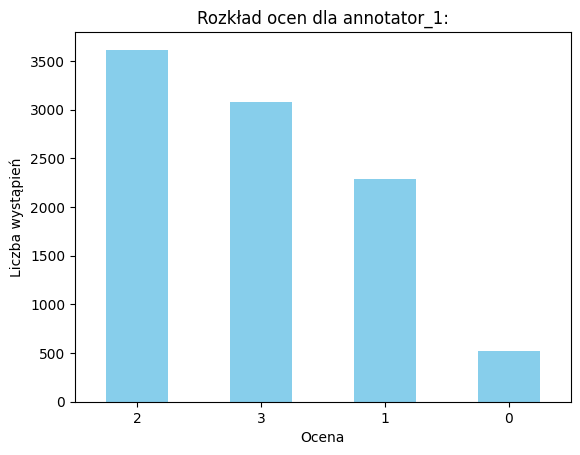

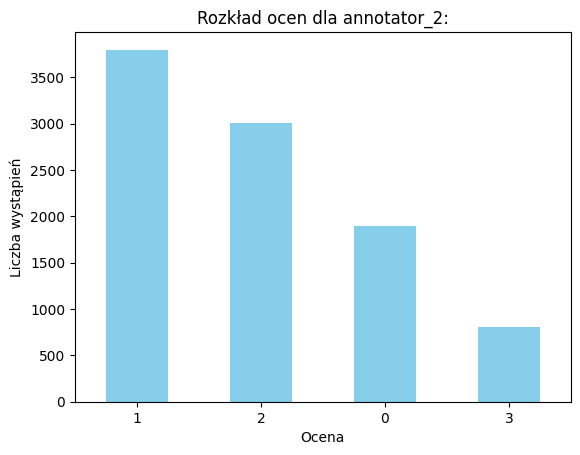

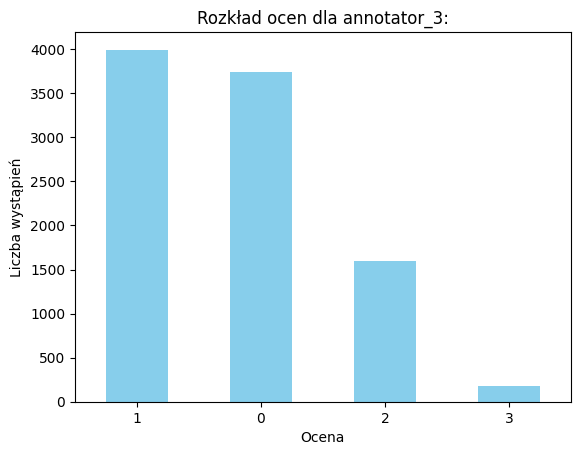

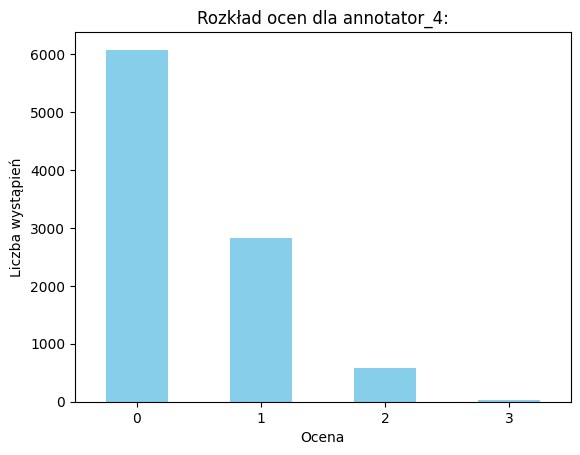

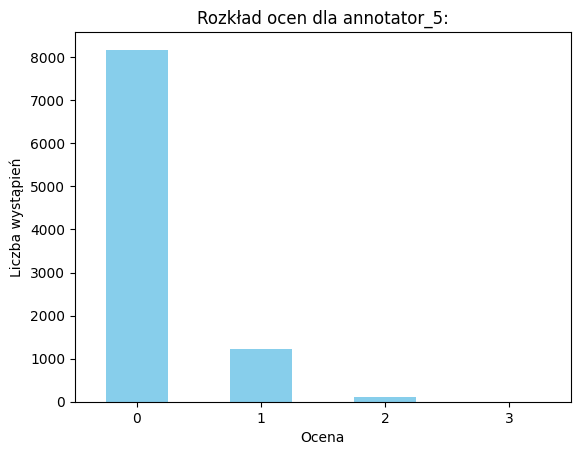

In [71]:
# Obliczenie rozkładu ocen dla annotatora_1
import matplotlib.pyplot as plt
for i in range(5):
    name = f'annotator_{i+1}'
    annotator_tmp = train_humi[name].value_counts()
    annotator_tmp.plot(kind='bar', color='skyblue')
    plt.title(f"Rozkład ocen dla {name}:")
    plt.xlabel('Ocena')
    plt.ylabel('Liczba wystąpień')
    plt.xticks(rotation=0)
    plt.show()


In [72]:
# test

In [73]:
new_columns = ['id', 'original','annotator_id', 'grade']
new_data = []

for index, row in train_humi.iterrows():
    for i in range(1, 6):  # Iterujemy przez annotator_1 do annotator_5
        annotator_id = i
        grade = row[f'annotator_{i}']
        new_data.append([row['id'], row['original'], annotator_id, grade])

new_train_humi = pd.DataFrame(new_data, columns=new_columns)


In [74]:
new_train_humi[:20]

,id,original,annotator_id,grade
0,14530,France is ‘ hunting down its citizens who join...,1,1
1,14530,France is ‘ hunting down its citizens who join...,2,0
2,14530,France is ‘ hunting down its citizens who join...,3,0
3,14530,France is ‘ hunting down its citizens who join...,4,0
4,14530,France is ‘ hunting down its citizens who join...,5,0
5,13034,"Pentagon claims 2,000 % increase in Russian tr...",1,3
6,13034,"Pentagon claims 2,000 % increase in Russian tr...",2,3
7,13034,"Pentagon claims 2,000 % increase in Russian tr...",3,1
8,13034,"Pentagon claims 2,000 % increase in Russian tr...",4,1
9,13034,"Pentagon claims 2,000 % increase in Russian tr...",5,0


## Map to binary - edit 28/03

In [75]:
##
# def map_to_humorous(grade):
#     if grade == 0:
#         return False
#     else:
#         return True
def map_to_humorous(grade):
    if grade == 0:
        return 0
    else:
        return 1

new_train_humi['humorous'] = new_train_humi['grade'].apply(map_to_humorous)

In [76]:
new_train_humi[20:30]

,id,original,annotator_id,grade,humorous
20,6164,Trump was told weeks ago that Flynn misled sch...,1,0,False
21,6164,Trump was told weeks ago that Flynn misled sch...,2,0,False
22,6164,Trump was told weeks ago that Flynn misled sch...,3,0,False
23,6164,Trump was told weeks ago that Flynn misled sch...,4,0,False
24,6164,Trump was told weeks ago that Flynn misled sch...,5,0,False
25,8832,All 22 sounds Trump made in his speech to Cong...,1,2,True
26,8832,All 22 sounds Trump made in his speech to Cong...,2,2,True
27,8832,All 22 sounds Trump made in his speech to Cong...,3,2,True
28,8832,All 22 sounds Trump made in his speech to Cong...,4,0,False
29,8832,All 22 sounds Trump made in his speech to Cong...,5,0,False


In [77]:
new_train_humi.drop(columns=['grade'], inplace=True)

In [78]:
new_train_humi['humorous'].value_counts()

True     27141
False    20409
Name: humorous, dtype: int64

In [79]:
new_train_humi

,id,original,annotator_id,humorous
0,14530,France is ‘ hunting down its citizens who join...,1,True
1,14530,France is ‘ hunting down its citizens who join...,2,False
2,14530,France is ‘ hunting down its citizens who join...,3,False
3,14530,France is ‘ hunting down its citizens who join...,4,False
4,14530,France is ‘ hunting down its citizens who join...,5,False
...,...,...,...,...
47545,5255,Here 's What 's In The House-Approved Health f...,1,True
47546,5255,Here 's What 's In The House-Approved Health f...,2,True
47547,5255,Here 's What 's In The House-Approved Health f...,3,False
47548,5255,Here 's What 's In The House-Approved Health f...,4,False


### Saving preprocessed train split into csv and preprocessing other 2 splits

In [80]:
new_train_humi.count()

id              47550
original        47550
annotator_id    47550
humorous        47550
dtype: int64

In [81]:
new_train_humi.to_csv('./PreprocessedData/Humi_binary/final_train_b.csv', index=False)

### test split

In [82]:
## Test split
test_humi = pd.read_csv('Data/Humi/semeval-2020-task-7-dataset/subtask-1/test.csv', dtype={'grades': str})
test_humi.count()

id           3024
original     3024
edit         3024
grades       3024
meanGrade    3024
dtype: int64

In [83]:
test_humi = test_humi[test_humi['grades'].str.len() == 5]
test_humi.count()

id           2986
original     2986
edit         2986
grades       2986
meanGrade    2986
dtype: int64

In [84]:
test_humi['original'] = test_humi.apply(replace_text, axis=1)

In [85]:
test_humi.drop(columns=['edit'], inplace=True)
test_humi

,id,original,grades,meanGrade
0,36,The Latest : Election tally shows Cars turning...,31110,1.2
1,2157,House Intel onions Have Cleared Trump . So Are...,11000,0.4
2,9385,Christmas Is Canceled : Nazareth ’s Muslim gru...,11111,1.0
3,14434,White House says Trump 's legal bozos supports...,32210,1.6
4,9462,Election movers move Ryan seat toward Dems aft...,11000,0.4
...,...,...,...,...
3019,3921,Sen. Bernie Sanders says he ’s “ sickened ” by...,33210,1.8
3020,12371,Trump Repeals Regulation Protecting Owners Fro...,30000,0.6
3021,6845,Spicer : We do n't regret repeating claim that...,11000,0.4
3022,2902,Gunshots Fired Outside Houses of dogs in London,00000,0.0


In [86]:
annotators = ["annotator_1", "annotator_2", "annotator_3", "annotator_4", "annotator_5"]

for i, annotator in enumerate(annotators):
    test_humi[annotator] = [int(grade[i]) for grade in test_humi['grades']]

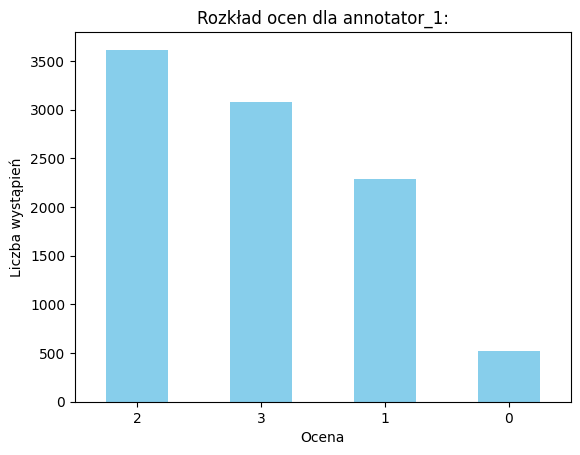

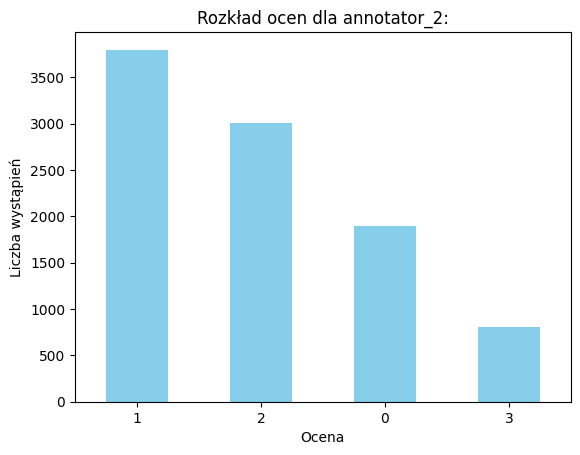

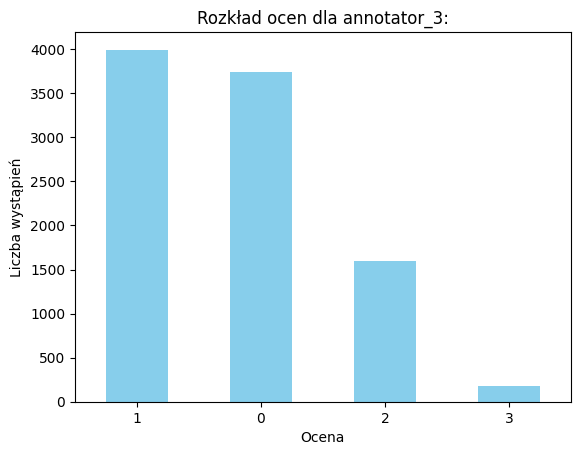

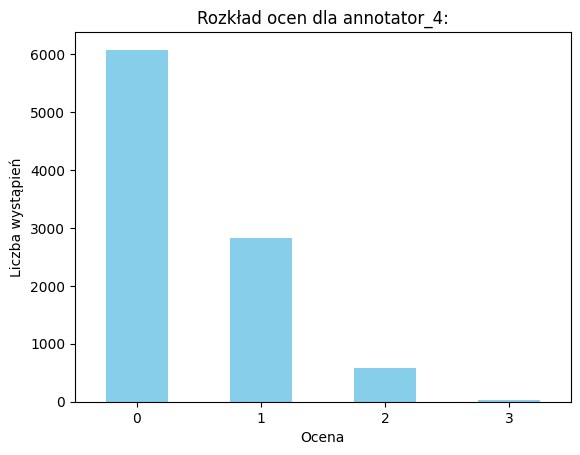

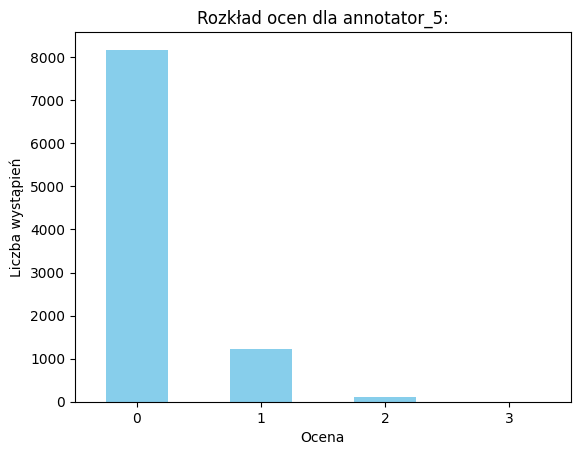

In [87]:
import matplotlib.pyplot as plt
for i in range(5):
    name = f'annotator_{i+1}'
    annotator_tmp = train_humi[name].value_counts()
    annotator_tmp.plot(kind='bar', color='skyblue')
    plt.title(f"Rozkład ocen dla {name}:")
    plt.xlabel('Ocena')
    plt.ylabel('Liczba wystąpień')
    plt.xticks(rotation=0)
    plt.show()

In [88]:
test_humi[:10]

,id,original,grades,meanGrade,annotator_1,annotator_2,annotator_3,annotator_4,annotator_5
0,36,The Latest : Election tally shows Cars turning...,31110,1.2,3,1,1,1,0
1,2157,House Intel onions Have Cleared Trump . So Are...,11000,0.4,1,1,0,0,0
2,9385,Christmas Is Canceled : Nazareth ’s Muslim gru...,11111,1.0,1,1,1,1,1
3,14434,White House says Trump 's legal bozos supports...,32210,1.6,3,2,2,1,0
4,9462,Election movers move Ryan seat toward Dems aft...,11000,0.4,1,1,0,0,0
5,5773,"In long-feared twist , online leak rattles Fre...",11100,0.6,1,1,1,0,0
6,11975,Flynn has promised Special Counsel ' full coop...,32210,1.6,3,2,2,1,0
7,10047,Jones does n't think Trump should resign over ...,21111,1.2,2,1,1,1,1
8,9595,"As a Black veteran , I always stand for the qu...",21110,1.0,2,1,1,1,0
9,12085,A plan to tax US pets has better odds of becom...,11000,0.4,1,1,0,0,0


In [89]:
new_columns = ['id', 'original','annotator_id', 'grade']
new_data = []

for index, row in test_humi.iterrows():
    for i in range(1, 6):  # Iterujemy przez annotator_1 do annotator_5
        annotator_id = i
        grade = row[f'annotator_{i}']
        new_data.append([row['id'], row['original'], annotator_id, grade])

new_test_humi = pd.DataFrame(new_data, columns=new_columns)


In [90]:
new_test_humi[:25]

,id,original,annotator_id,grade
0,36,The Latest : Election tally shows Cars turning...,1,3
1,36,The Latest : Election tally shows Cars turning...,2,1
2,36,The Latest : Election tally shows Cars turning...,3,1
3,36,The Latest : Election tally shows Cars turning...,4,1
4,36,The Latest : Election tally shows Cars turning...,5,0
5,2157,House Intel onions Have Cleared Trump . So Are...,1,1
6,2157,House Intel onions Have Cleared Trump . So Are...,2,1
7,2157,House Intel onions Have Cleared Trump . So Are...,3,0
8,2157,House Intel onions Have Cleared Trump . So Are...,4,0
9,2157,House Intel onions Have Cleared Trump . So Are...,5,0


In [91]:
new_test_humi.count()

id              14930
original        14930
annotator_id    14930
grade           14930
dtype: int64

In [92]:
##
def map_to_humorous(grade):
    if grade == 0:
        return 0
    else:
        return 1

new_test_humi['humorous'] = new_test_humi['grade'].apply(map_to_humorous)

In [93]:
new_test_humi

,id,original,annotator_id,grade,humorous
0,36,The Latest : Election tally shows Cars turning...,1,3,True
1,36,The Latest : Election tally shows Cars turning...,2,1,True
2,36,The Latest : Election tally shows Cars turning...,3,1,True
3,36,The Latest : Election tally shows Cars turning...,4,1,True
4,36,The Latest : Election tally shows Cars turning...,5,0,False
...,...,...,...,...,...
14925,4440,Flynn has promised Special Counsel ' full mont...,1,2,True
14926,4440,Flynn has promised Special Counsel ' full mont...,2,1,True
14927,4440,Flynn has promised Special Counsel ' full mont...,3,1,True
14928,4440,Flynn has promised Special Counsel ' full mont...,4,0,False


In [94]:
new_test_humi.drop(columns=['grade'], inplace=True)

In [95]:
new_test_humi

,id,original,annotator_id,humorous
0,36,The Latest : Election tally shows Cars turning...,1,True
1,36,The Latest : Election tally shows Cars turning...,2,True
2,36,The Latest : Election tally shows Cars turning...,3,True
3,36,The Latest : Election tally shows Cars turning...,4,True
4,36,The Latest : Election tally shows Cars turning...,5,False
...,...,...,...,...
14925,4440,Flynn has promised Special Counsel ' full mont...,1,True
14926,4440,Flynn has promised Special Counsel ' full mont...,2,True
14927,4440,Flynn has promised Special Counsel ' full mont...,3,True
14928,4440,Flynn has promised Special Counsel ' full mont...,4,False


In [96]:
new_test_humi.to_csv('./PreprocessedData/Humi_binary/final_test_b.csv', index=False)

### Dev/val split

In [97]:
dev_humi = pd.read_csv('Data/Humi/semeval-2020-task-7-dataset/subtask-1/dev.csv', dtype={'grades': str})
dev_humi.count()

id           2419
original     2419
edit         2419
grades       2419
meanGrade    2419
dtype: int64

In [98]:
dev_humi = dev_humi[dev_humi['grades'].str.len() == 5]
dev_humi.count()

id           2390
original     2390
edit         2390
grades       2390
meanGrade    2390
dtype: int64

In [99]:
dev_humi['original'] = dev_humi.apply(replace_text, axis=1)

In [100]:
dev_humi.drop(columns=['edit'], inplace=True)

In [101]:
dev_humi[20:35]

,id,original,grades,meanGrade
20,6814,Spicer : Hitler ' Did n't Even Sink to Using C...,21100,0.8
21,4611,20 percent of Republicans are completely okay ...,31100,1.0
22,4334,"Trump : North Korea ' eating in a very , very ...",22110,1.2
23,9101,"Foreign workers dance out of Singapore , with ...",32200,1.4
24,6585,Duke still developping new nukes,10000,0.2
25,12156,White House blasts request from China as ' Orw...,00000,0.0
26,1183,Kushner to visit therapist following latest Tr...,33332,2.8
27,2428,Turnip 's 2018 physical exam results,11110,0.8
28,11600,Hillary Clinton ‘ Convinced ’ Trump Associates...,11000,0.4
29,3162,Trump hugs Justice Department 's top official ...,11100,0.6


In [102]:
annotators = ["annotator_1", "annotator_2", "annotator_3", "annotator_4", "annotator_5"]

for i, annotator in enumerate(annotators):
    dev_humi[annotator] = [int(grade[i]) for grade in dev_humi['grades']]

In [103]:
dev_humi[20:35]

,id,original,grades,meanGrade,annotator_1,annotator_2,annotator_3,annotator_4,annotator_5
20,6814,Spicer : Hitler ' Did n't Even Sink to Using C...,21100,0.8,2,1,1,0,0
21,4611,20 percent of Republicans are completely okay ...,31100,1.0,3,1,1,0,0
22,4334,"Trump : North Korea ' eating in a very , very ...",22110,1.2,2,2,1,1,0
23,9101,"Foreign workers dance out of Singapore , with ...",32200,1.4,3,2,2,0,0
24,6585,Duke still developping new nukes,10000,0.2,1,0,0,0,0
25,12156,White House blasts request from China as ' Orw...,00000,0.0,0,0,0,0,0
26,1183,Kushner to visit therapist following latest Tr...,33332,2.8,3,3,3,3,2
27,2428,Turnip 's 2018 physical exam results,11110,0.8,1,1,1,1,0
28,11600,Hillary Clinton ‘ Convinced ’ Trump Associates...,11000,0.4,1,1,0,0,0
29,3162,Trump hugs Justice Department 's top official ...,11100,0.6,1,1,1,0,0


In [104]:
new_columns = ['id', 'original','annotator_id', 'grade']
new_data = []

for index, row in dev_humi.iterrows():
    for i in range(1, 6):  # Iterujemy przez annotator_1 do annotator_5
        annotator_id = i
        grade = row[f'annotator_{i}']
        new_data.append([row['id'], row['original'], annotator_id, grade])

new_dev_humi = pd.DataFrame(new_data, columns=new_columns)


In [105]:
new_dev_humi.count()

id              11950
original        11950
annotator_id    11950
grade           11950
dtype: int64

In [106]:
new_dev_humi[:20]

,id,original,annotator_id,grade
0,1723,Thousands of gay and bisexual swans convicted ...,1,2
1,1723,Thousands of gay and bisexual swans convicted ...,2,2
2,1723,Thousands of gay and bisexual swans convicted ...,3,1
3,1723,Thousands of gay and bisexual swans convicted ...,4,0
4,1723,Thousands of gay and bisexual swans convicted ...,5,0
5,12736,Special chef appointed to Trump Russia,1,2
6,12736,Special chef appointed to Trump Russia,2,1
7,12736,Special chef appointed to Trump Russia,3,1
8,12736,Special chef appointed to Trump Russia,4,0
9,12736,Special chef appointed to Trump Russia,5,0


In [107]:
##
def map_to_humorous(grade):
    if grade == 0:
        return 0
    else:
        return 1

new_dev_humi['humorous'] = new_dev_humi['grade'].apply(map_to_humorous)

In [108]:
new_dev_humi

,id,original,annotator_id,grade,humorous
0,1723,Thousands of gay and bisexual swans convicted ...,1,2,True
1,1723,Thousands of gay and bisexual swans convicted ...,2,2,True
2,1723,Thousands of gay and bisexual swans convicted ...,3,1,True
3,1723,Thousands of gay and bisexual swans convicted ...,4,0,False
4,1723,Thousands of gay and bisexual swans convicted ...,5,0,False
...,...,...,...,...,...
11945,14315,In Search of Donald Trump at His Boyhood Castle,1,1,True
11946,14315,In Search of Donald Trump at His Boyhood Castle,2,1,True
11947,14315,In Search of Donald Trump at His Boyhood Castle,3,1,True
11948,14315,In Search of Donald Trump at His Boyhood Castle,4,0,False


In [109]:
new_dev_humi.drop(columns=['grade'], inplace=True)

In [110]:
new_dev_humi

,id,original,annotator_id,humorous
0,1723,Thousands of gay and bisexual swans convicted ...,1,True
1,1723,Thousands of gay and bisexual swans convicted ...,2,True
2,1723,Thousands of gay and bisexual swans convicted ...,3,True
3,1723,Thousands of gay and bisexual swans convicted ...,4,False
4,1723,Thousands of gay and bisexual swans convicted ...,5,False
...,...,...,...,...
11945,14315,In Search of Donald Trump at His Boyhood Castle,1,True
11946,14315,In Search of Donald Trump at His Boyhood Castle,2,True
11947,14315,In Search of Donald Trump at His Boyhood Castle,3,True
11948,14315,In Search of Donald Trump at His Boyhood Castle,4,False


In [111]:
new_dev_humi.to_csv('./PreprocessedData/Humi_binary/final_dev_b.csv', index=False)

### Funlines (additional training)

In [75]:
fun_humi = pd.read_csv('Data/Humi/semeval-2020-task-7-dataset/subtask-1/train_funlines.csv', dtype={'grades': str})
fun_humi.count()

id           8248
original     8248
edit         8245
grades       8248
meanGrade    8248
dtype: int64

In [76]:
fun_humi[20:35]

,id,original,edit,grades,meanGrade
20,100020,Department of <Justice/> declines to prosecute...,Faggots,22100,1.0
21,100021,Department of Justice declines to <prosecute/>...,whip,22111,1.4
22,100022,Marriott International announced that it will ...,tubs,21100,0.8
23,100023,Fallout from Russia 's mysterious <missile/> d...,political,11111,1.0
24,100024,"With A Straight Face , Trump <Campaign/> Aide ...",insanity,33110,1.6
25,100025,"With A Straight Face , Trump Campaign Aide <In...",lies,32110,1.4
26,100026,"Canada pledges water bombers , $ 15M to fight ...",GoT,22210,1.4
27,100027,Bernie Sanders pledges to protect news organiz...,spying,0,0.0
28,100028,Bernie Sanders pledges to protect <news/> orga...,carpentry,21100,0.8
29,100029,Trump deserves <impeachment/> quite apart from...,blown,0,0.0


only here there is a need deleting 0 values

In [77]:
fun_humi = fun_humi[fun_humi['grades'] != '0']
fun_humi.dropna(subset=['edit'], inplace=True)
fun_humi.count()

id           8095
original     8095
edit         8095
grades       8095
meanGrade    8095
dtype: int64

In [78]:
fun_humi = fun_humi[fun_humi['grades'].str.len() == 5]
fun_humi.count()

id           7720
original     7720
edit         7720
grades       7720
meanGrade    7720
dtype: int64

In [79]:
fun_humi

,id,original,edit,grades,meanGrade
0,100000,Donald Trump <skips/> G7 talks on climate cris...,misunderstands,22110,1.2
1,100001,Donald Trump <skips/> G7 talks on climate cris...,praises,33100,1.4
2,100002,The queen agrees to <suspend/> parliament,dismantle,31110,1.2
3,100003,<Apple/> reverses stance on iPhone repairs an...,Microsoft,20000,0.4
4,100004,Apple reverses stance on iPhone repairs and wi...,death,22211,1.6
...,...,...,...,...,...
8243,108243,Banning Facial <Recognition/> Is n’t Enough - ...,Cleansers,22222,2.0
8244,108244,Trump is reportedly threatening <Republicans/>...,children,21100,0.8
8245,108245,Peruvian indigenous group wins suit to block o...,Women,22110,1.2
8246,108246,Joe Rogan says he 's probably voting for <Bern...,Illuminati,22000,0.8


In [80]:
def replace_text(row):
    original_text = str(row['original'])  # Konwersja na string
    edit_text = str(row['edit'])
    replaced_text = re.sub(r'<.*?/>', edit_text, original_text)
    return replaced_text

fun_humi['original'] = fun_humi.apply(replace_text, axis=1)

In [81]:
fun_humi[50:55]

,id,original,edit,grades,meanGrade
55,100055,Broken Dems say Trump admin blocking visits t...,Broken,10000,0.2
56,100056,House Dems say Trump admin blocking visits to ...,funhouse,22220,1.6
57,100057,' Walking Dead ' zombie and former firefighter...,zombie,11110,0.8
58,100058,' Walking Dead ' actor and former firefighter ...,alligator,33220,2.0
59,100059,' Walking Dead ' actor and former firefighter ...,zombies,32110,1.4


In [84]:
fun_humi.drop(columns=['edit'], inplace=True)

In [85]:
fun_humi

,id,original,grades,meanGrade
0,100000,Donald Trump misunderstands G7 talks on climat...,22110,1.2
1,100001,Donald Trump praises G7 talks on climate crisi...,33100,1.4
2,100002,The queen agrees to dismantle parliament,31110,1.2
3,100003,Microsoft reverses stance on iPhone repairs a...,20000,0.4
4,100004,Apple reverses stance on iPhone repairs and wi...,22211,1.6
...,...,...,...,...
8243,108243,Banning Facial Cleansers Is n’t Enough - Bruce...,22222,2.0
8244,108244,Trump is reportedly threatening children to ke...,21100,0.8
8245,108245,Peruvian indigenous group wins suit to block o...,22110,1.2
8246,108246,Joe Rogan says he 's probably voting for Illum...,22000,0.8


In [86]:
annotators = ["annotator_1", "annotator_2", "annotator_3", "annotator_4", "annotator_5"]

for i, annotator in enumerate(annotators):
    fun_humi[annotator] = [int(grade[i]) for grade in fun_humi['grades']]

In [87]:
fun_humi

,id,original,grades,meanGrade,annotator_1,annotator_2,annotator_3,annotator_4,annotator_5
0,100000,Donald Trump misunderstands G7 talks on climat...,22110,1.2,2,2,1,1,0
1,100001,Donald Trump praises G7 talks on climate crisi...,33100,1.4,3,3,1,0,0
2,100002,The queen agrees to dismantle parliament,31110,1.2,3,1,1,1,0
3,100003,Microsoft reverses stance on iPhone repairs a...,20000,0.4,2,0,0,0,0
4,100004,Apple reverses stance on iPhone repairs and wi...,22211,1.6,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...
8243,108243,Banning Facial Cleansers Is n’t Enough - Bruce...,22222,2.0,2,2,2,2,2
8244,108244,Trump is reportedly threatening children to ke...,21100,0.8,2,1,1,0,0
8245,108245,Peruvian indigenous group wins suit to block o...,22110,1.2,2,2,1,1,0
8246,108246,Joe Rogan says he 's probably voting for Illum...,22000,0.8,2,2,0,0,0


In [88]:
new_columns = ['id', 'original','annotator_id', 'grade']
new_data = []

for index, row in fun_humi.iterrows():
    for i in range(1, 6):  # Iterujemy przez annotator_1 do annotator_5
        annotator_id = i
        grade = row[f'annotator_{i}']
        new_data.append([row['id'], row['original'], annotator_id, grade])

new_fun_humi = pd.DataFrame(new_data, columns=new_columns)


In [90]:

new_fun_humi.count()

id              38600
original        38600
annotator_id    38600
grade           38600
dtype: int64

In [91]:
new_fun_humi[:20]

,id,original,annotator_id,grade
0,100000,Donald Trump misunderstands G7 talks on climat...,1,2
1,100000,Donald Trump misunderstands G7 talks on climat...,2,2
2,100000,Donald Trump misunderstands G7 talks on climat...,3,1
3,100000,Donald Trump misunderstands G7 talks on climat...,4,1
4,100000,Donald Trump misunderstands G7 talks on climat...,5,0
5,100001,Donald Trump praises G7 talks on climate crisi...,1,3
6,100001,Donald Trump praises G7 talks on climate crisi...,2,3
7,100001,Donald Trump praises G7 talks on climate crisi...,3,1
8,100001,Donald Trump praises G7 talks on climate crisi...,4,0
9,100001,Donald Trump praises G7 talks on climate crisi...,5,0


In [92]:
new_fun_humi.to_csv('./PreprocessedData/Humi/train_funlines_final.csv', index=False)